In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_data = train_datagen.flow_from_directory(
    'dataset/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    'dataset/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)



Found 4658 images belonging to 6 classes.
Found 1994 images belonging to 6 classes.


In [3]:
print(train_data.class_indices)

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2, 'Tomato___Early_blight': 3, 'Tomato___Late_blight': 4, 'Tomato___healthy': 5}


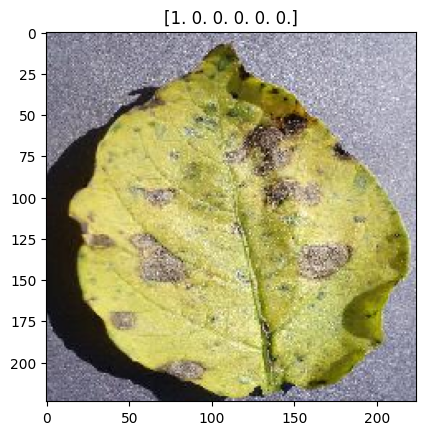

In [4]:
for image_batch, label_batch in train_data:
    plt.imshow(image_batch[0])
    plt.title(label_batch[0])
    plt.show()
    break


In [5]:
from tensorflow.keras.applications import MobileNetV2 # type: ignore
from tensorflow.keras.models import Model # type: ignore
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout # type: ignore

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # freeze base layers


2025-11-17 21:22:31.212260: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-11-17 21:22:31.212481: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-11-17 21:22:31.212488: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-11-17 21:22:31.212798: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-17 21:22:31.212826: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


In [7]:
from tensorflow.keras.optimizers import Adam # type: ignore
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    verbose=1
)


Epoch 1/15


2025-11-17 21:22:43.386622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


146/146 ━━━━━━━━━━━━━━━━━━━━ 29s 164ms/step - accuracy: 0.6252 - loss: 1.0440 - val_accuracy: 0.8490 - val_loss: 0.4769
Epoch 2/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 22s 151ms/step - accuracy: 0.8111 - loss: 0.5270 - val_accuracy: 0.8872 - val_loss: 0.3243
Epoch 3/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 22s 148ms/step - accuracy: 0.8553 - loss: 0.3864 - val_accuracy: 0.9012 - val_loss: 0.2717
Epoch 4/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 21s 147ms/step - accuracy: 0.8787 - loss: 0.3171 - val_accuracy: 0.9152 - val_loss: 0.2354
Epoch 5/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 21s 145ms/step - accuracy: 0.8950 - loss: 0.2778 - val_accuracy: 0.9243 - val_loss: 0.2097
Epoch 6/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 21s 145ms/step - accuracy: 0.9116 - loss: 0.2457 - val_accuracy: 0.9288 - val_loss: 0.1953
Epoch 7/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 21s 145ms/step - accuracy: 0.9201 - loss: 0.2261 - val_accuracy: 0.9353 - val_loss: 0.1826
Epoch 8/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 22s 150ms/step - accuracy: 0.9270 - loss: 0.2007 - val

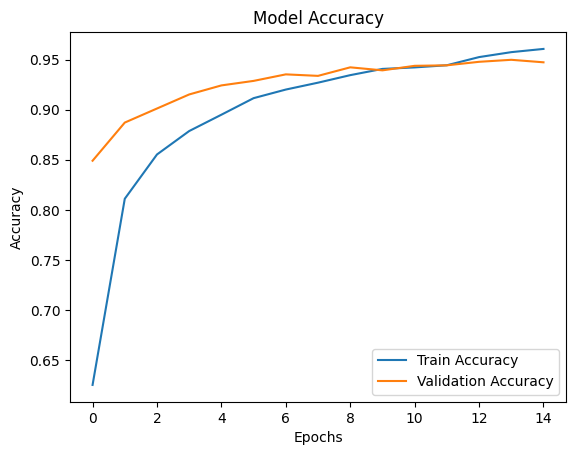

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [10]:
model.save('model.h5')


In [11]:
for layer in base_model.layers[-20:]:
    layer.trainable = True
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_data, validation_data=val_data, epochs=5)


Epoch 1/5
146/146 ━━━━━━━━━━━━━━━━━━━━ 36s 207ms/step - accuracy: 0.8845 - loss: 0.3318 - val_accuracy: 0.9463 - val_loss: 0.1564
Epoch 2/5
146/146 ━━━━━━━━━━━━━━━━━━━━ 29s 196ms/step - accuracy: 0.9253 - loss: 0.2062 - val_accuracy: 0.9473 - val_loss: 0.1521
Epoch 3/5
146/146 ━━━━━━━━━━━━━━━━━━━━ 30s 207ms/step - accuracy: 0.9410 - loss: 0.1634 - val_accuracy: 0.9458 - val_loss: 0.1474
Epoch 4/5
146/146 ━━━━━━━━━━━━━━━━━━━━ 25s 173ms/step - accuracy: 0.9564 - loss: 0.1331 - val_accuracy: 0.9463 - val_loss: 0.1469
Epoch 5/5
146/146 ━━━━━━━━━━━━━━━━━━━━ 25s 172ms/step - accuracy: 0.9657 - loss: 0.1040 - val_accuracy: 0.9488 - val_loss: 0.1494
